The TIMIT corpus of read speech is designed to provide speech data for acoustic-phonetic studies and for the development and evaluation of automatic speech recognition systems. TIMIT contains broadband recordings of 630 speakers of eight major dialects of American English, each reading ten phonetically rich sentences.

for the speaker identification I have used a different approach. First I have converted the audio samples into their respective 
spectrums. Then I have used CNN architecture in order to extract the features from the respected spectrums for 523 different people

In [ ]:
# Removing all other files except .WAV extension file i.e is audio file
import os
os.chdir(r'D:\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN+TEST')
path_TIMIT=os.getcwd()
person=os.listdir()
for c in person:
        path_person=os.path.join(path_TIMIT,c)
        os.chdir(path_person)
        person_files=os.listdir()
        for d in person_files:
                os.chdir(path_person)
                for i in os.listdir():
                    flag=0
                    leng=len(i)
                    for j in i:
                        if(j!='V'):
                            flag=flag+1
                        if(flag==leng):
                            path_fil=os.path.join(path_person,i)
                            os.remove(path_fil)
        





In [ ]:
# Converting the audio files in their respective spectrums
import matplotlib.pyplot as plt
import os
#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd
os.chdir(r'D:\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN+TEST')
TRAIN_TEST_path=os.getcwd()
per=os.listdir()


for person in per:
    path=os.path.join(TRAIN_TEST_path,person)
    #print(path)
    audio_clips = os.listdir(path)
   # print("No. of .wav files in audio folder = ",len(audio_clips))
    os.chdir(path)
    for song in os.listdir():
        song_path=os.path.join(path,song)
        x, sr = librosa.load(song_path, sr=44100)
        X = librosa.stft(x)
        Xdb = librosa.amplitude_to_db(abs(X))
        plt.figure(figsize=(15, 15))
        librosa.display.specshow(Xdb, sr=sr, y_axis='log')
        plt.savefig(song+'.png', bbox_inches='tight')
        plt.colorbar()

In [1]:
#Removing all the audio samples except Spectrography files
import os
os.chdir(r'D:\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN+TEST')
path_TIMIT=os.getcwd()
person=os.listdir()
for c in person:
        path_person=os.path.join(path_TIMIT,c)
        os.chdir(path_person)
        person_files=os.listdir()
        for d in person_files:
                os.chdir(path_person)
                for i in os.listdir():
                    flag=0
                    leng=len(i)
                    for j in i:
                        if(j!='g'):
                            flag=flag+1
                            
                        if(flag==leng):
                            path_fil=os.path.join(path_person,i)
                            os.remove(path_fil)

In [2]:
import os
os.chdir(r'D:\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN+TEST')
train_dir=os.getcwd()
len(os.listdir())  # No. of Unique people

523

In [3]:
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

Using TensorFlow backend.


In [4]:
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)
train_data=train_datagen.flow_from_directory(train_dir,target_size=(10,10),subset='training')
test_data=train_datagen.flow_from_directory(train_dir,target_size=(10,10),subset='validation')

Found 4184 images belonging to 523 classes.
Found 1046 images belonging to 523 classes.


In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
os.chdir(r'D:\TIMIT\data\lisa\data\timit\raw\TIMIT\TRAIN+TEST\FADG0')
image=mpimg.imread('SA1.WAV.PNG')

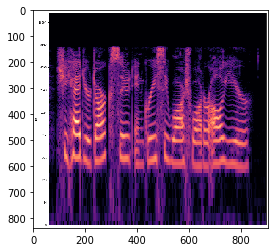

In [8]:
plt.imshow(image)  # audio spectrum corresponding to person 1

In [ ]:
from PIL import Image
image=Image.open('D:\Trial\FCJF0\SA1.WAV.png')
image.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(image)

In [9]:
# Lets build a CNN Model 
model=tf.keras.Sequential([ tf.keras.layers.Conv2D(64,(3,3),input_shape=(10,10,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                            tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(523,activation='softmax')
                           ])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
#Lets compile a model for 1 epoch (Since 1 epoch is taking 4.50 mins on the input size of(10,10,3))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit_generator(train_data,validation_data=test_data,epochs=1)

131/131 [==============================] - 354s 3s/step - loss: 6.2645 - acc: 0.0017 - val_loss: 6.2596 - val_acc: 0.0019
